In [1]:
# !pip3 install scikit-learn termcolor

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn as skl
from termcolor import colored

# Classification

Suppose we have a set of objects, described by their features $x^{(k)}$, and labels $l^{(k)}$ assigned to the objects.
Doing statistical classification we find the rule $f$ that maps $x^{(k)}$ to $l^{(k)}$ and generalize the rule to all possible objects.
For example, given samples of handwritten digits, problem of statistical classification is to assign the correct digit to an arbitrary character.

From mathematical point of view, the classifier $f$ is a mapping from the vector space $\mathbb R^N$ of all features $x$  to the vector space $\mathbb R^M$ of scores $p$, where $N$ is the number of features, and $M$ is the number of classes. In the simplest case the output of the classifier can be the class/label $l$ itself, but usage of scores instead of labels have several benefits: (1) the score shows confidence in the result, (2) scores are differentiable what is a desirable property for machine learning, (3) cross-entropy loss function can be used. 
It is convenient to consider score $p_l$ as the probability of $x$ to belong to the class $l$, therefore $p$ should be properly normalized: 
$p_l\geq 0$, $\sum_l p_l=1$.

In ML the classifier $f(\cdot|\theta)$ is taken from a predefined set, chosen to match known properties of the problem. 
Then the parameters $\theta$ of the classifier are tuned to match the training set $x^{train,k}$, $p^{train,k}$ in the best possible way.
Two method are most popular for training the classifier: (1) point estimation of $\theta$, e.g. maximum likelyhood method, and (2) Bayesian inference capable of estimation of probability distribution of $\theta$.

## Point estimation

Suppose $f(x|\theta)=p$ is the probability destribution of $x$ to belong to each class for specified parameters $\theta$ pf the classifier.
If the exact distribution is known, denote it by $\hat p(x)$, than the performance of the classifier can be estimated by the cross entropy function:
$$
H(p,\hat p)=-\sum_l p_l\log \hat p(x)_l.
$$
In applications the distribution is rarely known, instead samples $l^{k}$ of $p(x)$ are known.
In the case the cross entropy can be estimated by the following statistics:
$$
H(p,\hat p)\approx -S^{-1}\sum_k \log \hat p(x)_{l^{(k)}},
$$ 
where $S$ is total number of samples.
To estimate the performance of the estimate $\theta$ on all objects $x$, 
an averaging over all $x$ is applied, 
$$
E_x[H|\theta]\approx L[x,y|\theta]=-S^{-1}\sum_k \log \hat p(x^{(k)})_{l^{(k)}}. 
$$
The training of the classifier is just minimization of the loss function on the training set:
$$
\hat\theta = \mathrm{argmin}_\theta L[x^{train,k}|\theta), y^{train,k}|\theta].
$$



One of the simplest classifiers is linear classifier. Assume that there are only two possible classes for $x$ to belong to. 
Than the distribution $p$ is defined by the single value $p_0\in[0,1]$ defining the probability of $x$ to belong to the class $0$.
The linear classifier assumes that classes are separated by a hyperplane, therefore the score is computed by:
$$
p_0(x|\theta)=f(x\cdot\theta)=f(\sum_j x_j \theta_j),
$$
where common choice for the activatio function $f$ are step function and logistic function:
$$
f(a)=(1+e^{-x})^{-1}.
$$
Applying a fixed non-linear tranform $T$ to the points $x$ before evaluation of the inner product,
$$
p_0(x|\theta)=f(T(x)\cdot\theta)=f(\sum_j T(x)_j \theta_j),
$$
effectively transforms the dividing hyperplane to arbitrary complex hypersurface, 
thus hugely increasing class of the problems solvable by the linear regression.
The transform $T$ can even map every element $x$ to several features, e.g. polynomial basis,
allowing reconstruction of almost arbitrary dependence in data.
Increasing number of features can potentialy significantly slow down computation,
but [kernel trick](https://en.wikipedia.org/wiki/Kernel_method) can be used to even infinite number of features without overhead.




## Performance metrics

Performance of the classifier can be estimated using [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) 
and derived metrics such as [precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall) for binary classifiers.
The metrics can be misleading, if the data is unbalanced, that is if numbers of postive and negative cases are significantly different. 

If a classifier returns score for each class, than boundary between classes are determined by the threshold value. 
The best possible value can be estimated from [Receiver operating characteristic (ROC) curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic),
which is dependence of true positive cases on false positive. 
The best threshold corresponds to upper left point on the plot.
The area under the ROC curve is also used to compare different classifiers.


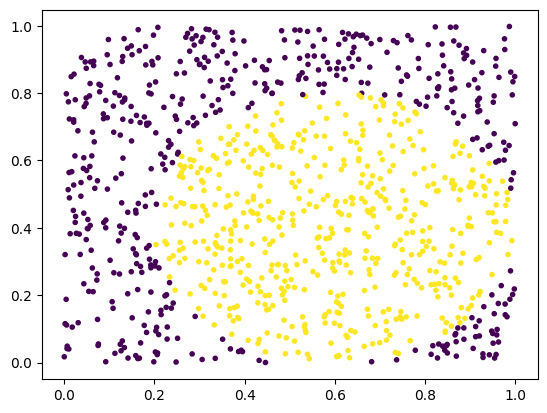

In [8]:
def visualize(x=None, y=None, y_predicted=None, axis=None):
    nitems = x.shape[0]
    assert y.shape == (nitems,)    
    assert x.ndim == 2 

    if y_predicted is not None:
        assert y_predicted.shape == y.shape
        wrong_predictions = y!=y_predicted
    else:
        wrong_predictions = slice(0)
    
    if axis is None:
        _fig, axis = plt.subplots()
        
    if x.shape[1] == 2: # Scatter plot vizualization
        axis.scatter(x=x[wrong_predictions,0], y=x[wrong_predictions,1], c='r', marker=',')
        axis.scatter(x=x[:,0], y=x[:,1], c=y, marker='.')
    else: # Function plot
        axis.plot(x[wrong_predictions,:], c='r', linestyle='solid', linewidth=3)
        axis.plot(x[y==0,:].T, c='y', linestyle='solid')
        axis.plot(x[y==1,:].T, c='b', linestyle='solid')        
        
        

class TestProblem:
    def sample(self, nitems: int) -> (np.ndarray, np.ndarray):
        raise NotImplementedError

    def visualize(self, nitems=1000, axis=None):
        x, y = self.sample(nitems=nitems)
        visualize(x=x, y=y, axis=axis)

class CircleProblem(TestProblem):
    def __init__(self, center: np.ndarray, radius: float):
        self._center = np.array(center)
        assert self._center.ndim == 1
        self._radius = np.float32(radius)

    def sample(self, nitems):
        x = np.random.rand(nitems, self._center.shape[0])
        distance_to_the_center = np.linalg.norm(x-self._center[None], ord=2, axis=-1)
        y = distance_to_the_center<self._radius
        return x, y

problem = CircleProblem(center=(0.6, 0.4), radius=0.4)
problem.visualize()
plt.show()



Training data:
Confusion matrix:
 [[607  55]
 [152 186]]
Recall 91.69%, precision 79.97%, f1-measure 85.43%
Test data:
Confusion matrix:
 [[56  4]
 [16 24]]
Recall 93.33%, precision 77.78%, f1-measure 84.85%


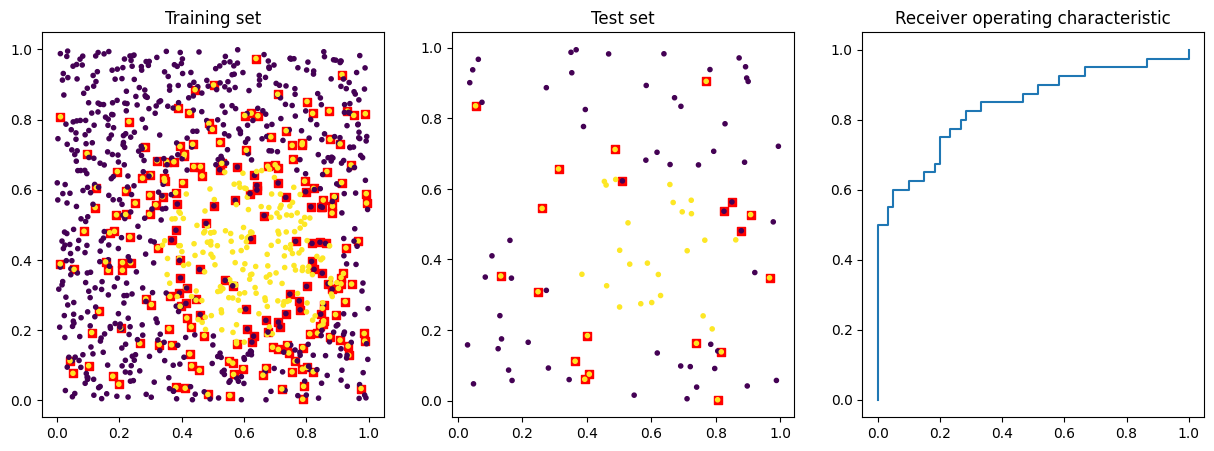

In [14]:
from sklearn import metrics

def confusion_matrix(y, y_predicted):
    mx = np.maximum(np.max(y),np.max(y_predicted))
    confusion_matrix = np.zeros((mx+1, mx+1), dtype=np.int32)
    
    for r, c in zip(y,y_predicted):
        confusion_matrix[r,c] += 1
    return confusion_matrix

def print_metrics(y, y_predicted):
    y = np.array(y, dtype=np.int8)
    y_predicted = np.array(y_predicted, dtype=np.int8)
    
    cm = confusion_matrix(y,y_predicted)
    print(f"Confusion matrix:\n", cm)

    if cm.shape[0]==2:
        (TP, FN), (FP, TN) = cm
        recall = TP/(TP+FN)
        precision = TP/(TP+FP)
        f1 = 2*TP/(2*TP+FP+FN)
        print(f"Recall {100*recall:.2f}%, precision {100*precision:.2f}%, f1-measure {100*f1:.2f}%")

def benchmark_classifier(clf, problem, n_training_samples=1000, n_test_samples=100):
    training_x, training_y = problem.sample(nitems=n_training_samples)
    test_x, test_y = problem.sample(nitems=n_test_samples)

    clf.fit(training_x, training_y)

    y_predicted = clf.predict(training_x)
    y_predicted_test = clf.predict(test_x)

    print(colored("Training data:","yellow"))
    print_metrics(training_y, y_predicted)

    print(colored("Test data:","green"))
    print_metrics(test_y, y_predicted_test)


    fig, (axis1, axis2, axis3) = plt.subplots(ncols=3, figsize=(15, 5))

    visualize(training_x, training_y, y_predicted, axis=axis1)
    axis1.set_title('Training set')

    visualize(test_x, test_y, y_predicted_test, axis=axis2)
    axis2.set_title('Test set')

    scores = clf.decision_function(test_x)
    fpr, tpr, thresholds = metrics.roc_curve(test_y, scores)
    axis3.plot(fpr, tpr)
    axis3.set_title('Receiver operating characteristic')

    plt.show()



from sklearn import svm
clf = svm.SVC()
benchmark_classifier(clf, problem)


## Problems:

1. `CircleProblem` above is an example of complete separation problem, that is a unique class is assigned deterministically to every features vector. In many cases however the boundary between the classes are blured or the classes overlap. That means that in general only probability distribution of the classes can be defined. 
As an example, consider a test binary classification problem `GaussProblem`, such that an object described by a vector from $\mathbb R^N$ belongs to the first (positives) class with the probability defined by the [multivariate normal distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution). The class of every object in the training/test is uniquely defined, despite the fact that the same object can belong to different classes on multiple occurances in the set. Define a class implementing the problem settings.

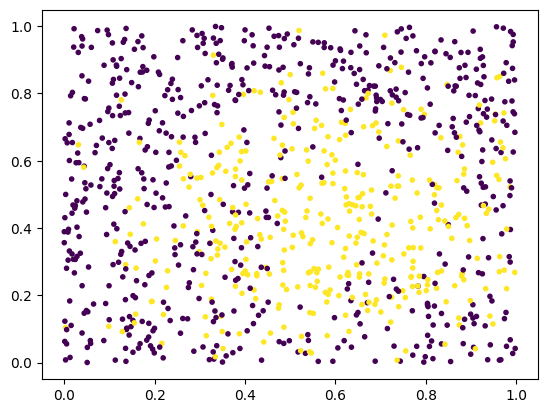

In [22]:
class GaussProblem(TestProblem):
    def __init__(self, center: np.ndarray, radius: float):
        self._center = np.array(center)
        assert self._center.ndim == 1
        self._radius = np.float32(radius)
        
    def score(self, points):
        assert points.ndim==2 and points.shape[1]==self._center.shape[0]
        distance_to_center_squared = np.sum( (points-self._center[None])**2, axis=-1)
        return np.exp(-distance_to_center_squared/(2*self._radius**2))

    def sample(self, nitems):
        x = np.random.rand(nitems, self._center.shape[0])
        zero_class_probability = self.score(x)
        y = np.random.rand(nitems)<=zero_class_probability
        return x, y

problem = GaussProblem(center=(0.6, 0.4), radius=0.25)
problem.visualize()
plt.show()

Training data:
Confusion matrix:
 [[545  78]
 [164 213]]
Recall 87.48%, precision 76.87%, f1-measure 81.83%
Test data:
Confusion matrix:
 [[45 14]
 [15 26]]
Recall 76.27%, precision 75.00%, f1-measure 75.63%


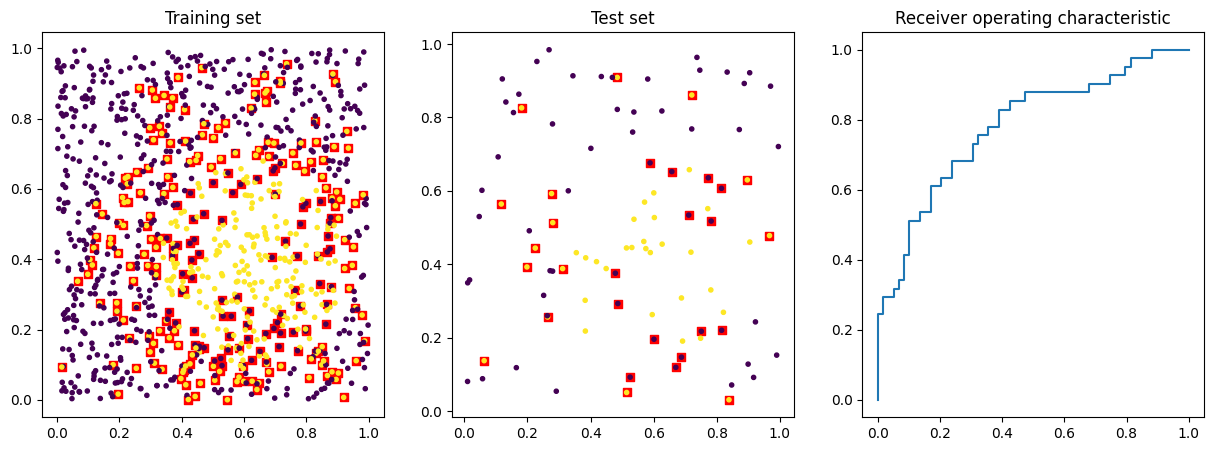

In [24]:
benchmark_classifier(clf, problem)

2. Boundary between the classes in `GaussProblem` is blured in contrast to `CircleProblem`. How does the bluring affect classification metrics?



Размытие границ в случае решения задачи, в которой принадлежность к классу определяется неперырвным вероятностным распределением, приведет к ухудшению проверочных метрик - например в случае многомерного нормального распределения - объекты близкие к границам имеет большую вероятность быть неверно классифицированы. Точность в этом случае падает (больше FP), recall(полнота) тоже упадет из за увеличения (FN), т.е. и f1-score упадет. ROC-кривая станет менее ступенькообразной, площадь под графиком меньше - предсказания хуже. Сравнивая визуально заметим, что даже на тренировочных данных предсказания стали хуже. 


The blurring of the boundary in `GaussProblem` introduces uncertainty in the classification process, as objects near the boundary have a higher likelihood of being misclassified. This affects classification metrics in the following ways:

1. **Precision and Recall**: Precision may decrease because some objects from the negative class might be misclassified as positive. Similarly, recall may also decrease as some positive objects might be misclassified as negative.

2. **F1-Score**: Since F1-Score is the harmonic mean of precision and recall, it will also be negatively impacted by the blurring.

3. **Confusion Matrix**: The number of false positives and false negatives will likely increase, leading to a less distinct separation in the confusion matrix.

4. **ROC Curve and AUC**: The ROC curve may become less steep, and the area under the curve (AUC) may decrease, indicating reduced classifier performance.

Overall, the blurring of the boundary reduces the classifier's ability to confidently distinguish between classes, leading to a decline in performance metrics.


3. Check parameters of the classifiers and tune them to avoid overfitting.

Посмотрим от каких параметров зависит предсказатель основанный на методе опорных векторов и подберем наилушие для решения проблемы с размытием.

### Параметры  SVC

1. **C** - определяет баланс между шириной разделяюещй плоскости и минимизацией ошибок на обучающем наборе, т.е. если С - маленькое (0.1) - сильная регуляризация, широкая гиперплоскость, игонрируем часть ошибок. Если C-большое (100) - м.б. переобучение, т.к. сложна гиперплоскость ценой минимизации ошибок 
 
2. **kernel** - ядро. параметр определяет тип используемого преобразования данных  $T$ в более высшему измерению. 
  типы ядер:
   - `linear`: Линейное ядро
   - `rbf`: Радиально-базисная функция (Gaussian Kernel)
   - `poly`: Полиномиальное ядро
   - `sigmoid`: Сигмоидальное ядро

3. **gamma** - параметр нелинейных ядер ( `rbf`, `poly` и `sigmoid`). Определяет, насколько сильно одно наблюдение влияет на другие. Малое значение (scale) - гладкая модель, наблюдение влияет на большу область. Большое (auto) - меньшая область влияния.


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Лучшие параметры: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Training data:
Confusion matrix:
 [[560 102]
 [114 224]]
Recall 84.59%, precision 83.09%, f1-measure 83.83%
Test data:
Confusion matrix:
 [[68  7]
 [12 13]]
Recall 90.67%, precision 85.00%, f1-measure 87.74%


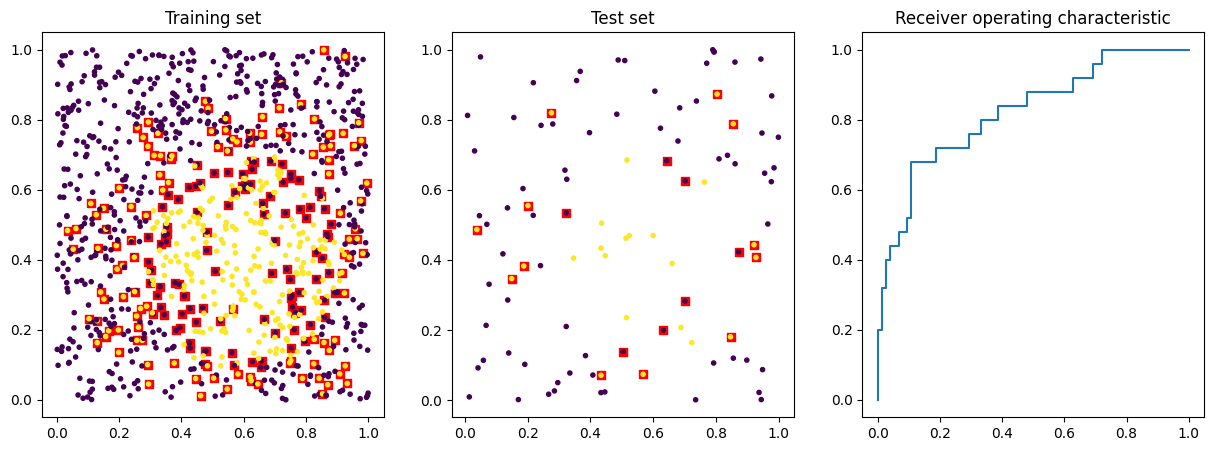

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}


grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='f1', verbose=1)


training_x, training_y = problem.sample(nitems=1000)


grid_search.fit(training_x, training_y)


print("Лучшие параметры:", grid_search.best_params_)


test_x, test_y = problem.sample(nitems=100)
best_clf = grid_search.best_estimator_
best_param = grid_search.best_params_
best_clf.set_params(**best_param)
benchmark_classifier(best_clf, problem)


Значения f1-score на тестовых данных улучшились

4. Compare classifiers [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) impl, [k-nearest neighbors algorithm
](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm), 
[`SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) impl. [support-vector_machine](https://en.wikipedia.org/wiki/Support-vector_machine) with different kernels, 
[`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) impl. [random forest method](https://ru.wikipedia.org/wiki/Random_forest)
from sklearn on `GaussProblem`, you may found usefull [this example](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html). Explain difference in the performance of the classifiers.

In [ ]:
def benchmark_classifier(clf, problem, n_training_samples=1000, n_test_samples=100):
    training_x, training_y = problem.sample(nitems=n_training_samples)
    test_x, test_y = problem.sample(nitems=n_test_samples)

    clf.fit(training_x, training_y)

    y_predicted = clf.predict(training_x)
    y_predicted_test = clf.predict(test_x)

    print(colored("Training data:","yellow"))
    print_metrics(training_y, y_predicted)

    print(colored("Test data:",'green'))
    print_metrics(test_y, y_predicted_test)


    fig, (axis1, axis2, axis3) = plt.subplots(ncols=3, figsize=(15, 5))

    visualize(training_x, training_y, y_predicted, axis=axis1)
    axis1.set_title('Training set')

    visualize(test_x, test_y, y_predicted_test, axis=axis2)
    axis2.set_title('Test set')

    if hasattr(clf, "decision_function"):
        scores = clf.decision_function(test_x)
    elif hasattr(clf, "predict_proba"):
        scores = clf.predict_proba(test_x)[:, 1]  # probability for ROC curve
    else:
        scores = clf.predict(test_x)
        
    fpr, tpr, thresholds = metrics.roc_curve(test_y, scores)
    axis3.plot(fpr, tpr)
    axis3.set_title('Receiver operating characteristic')

    plt.show()

Classifier: KNeighbors
Training data:
Confusion matrix:
 [[570  74]
 [ 98 258]]
Recall 88.51%, precision 85.33%, f1-measure 86.89%
Test data:
Confusion matrix:
 [[44 22]
 [12 22]]
Recall 66.67%, precision 78.57%, f1-measure 72.13%


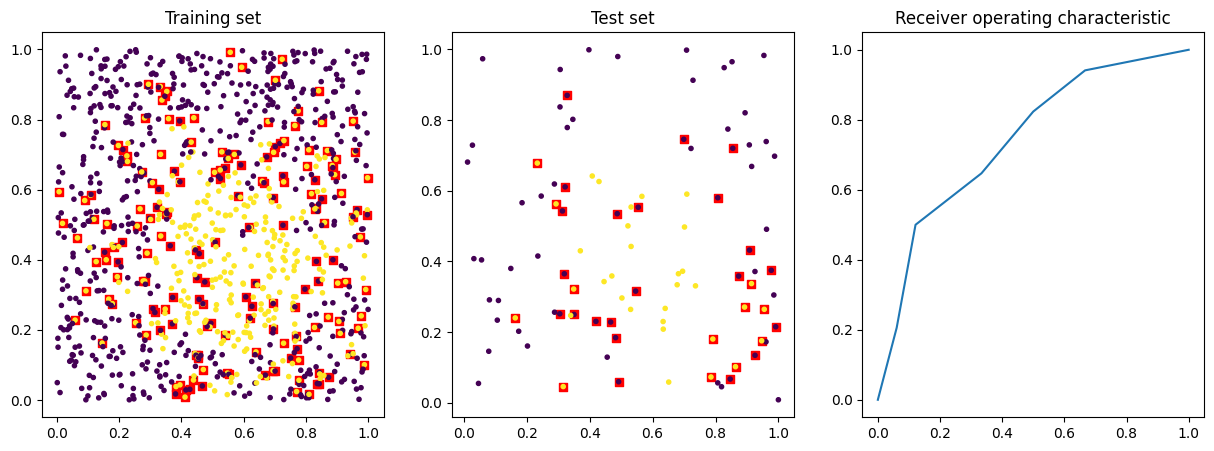

Classifier: SVC (linear kernel)
Training data:
Confusion matrix:
 [[658   0]
 [342   0]]
Recall 100.00%, precision 65.80%, f1-measure 79.37%
Test data:
Confusion matrix:
 [[59  0]
 [41  0]]
Recall 100.00%, precision 59.00%, f1-measure 74.21%


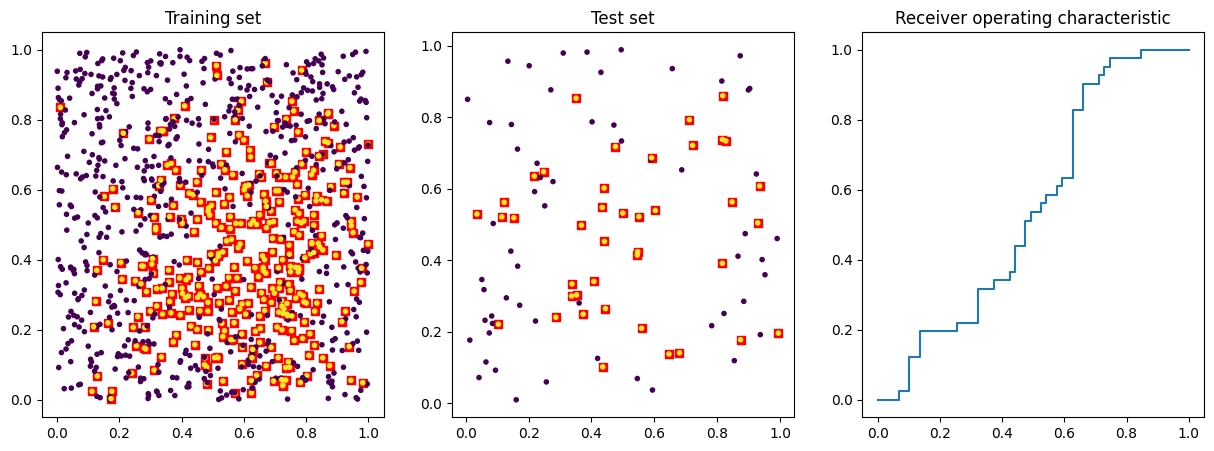

Classifier: SVC (RBF kernel)
Training data:
Confusion matrix:
 [[598  64]
 [164 174]]
Recall 90.33%, precision 78.48%, f1-measure 83.99%
Test data:
Confusion matrix:
 [[65  7]
 [14 14]]
Recall 90.28%, precision 82.28%, f1-measure 86.09%


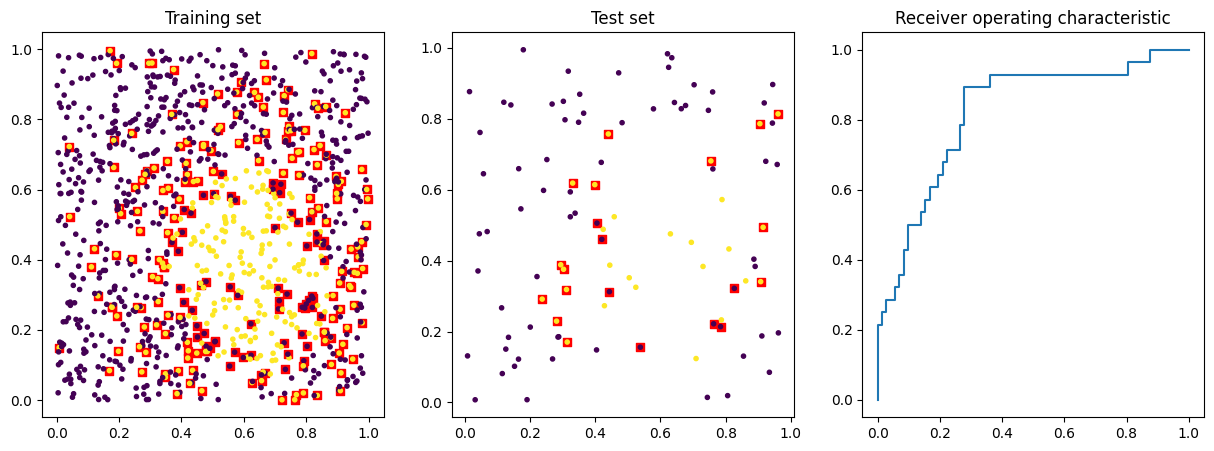

Classifier: RandomForestClassifier
Training data:
Confusion matrix:
 [[561  99]
 [120 220]]
Recall 85.00%, precision 82.38%, f1-measure 83.67%
Test data:
Confusion matrix:
 [[56 10]
 [14 20]]
Recall 84.85%, precision 80.00%, f1-measure 82.35%


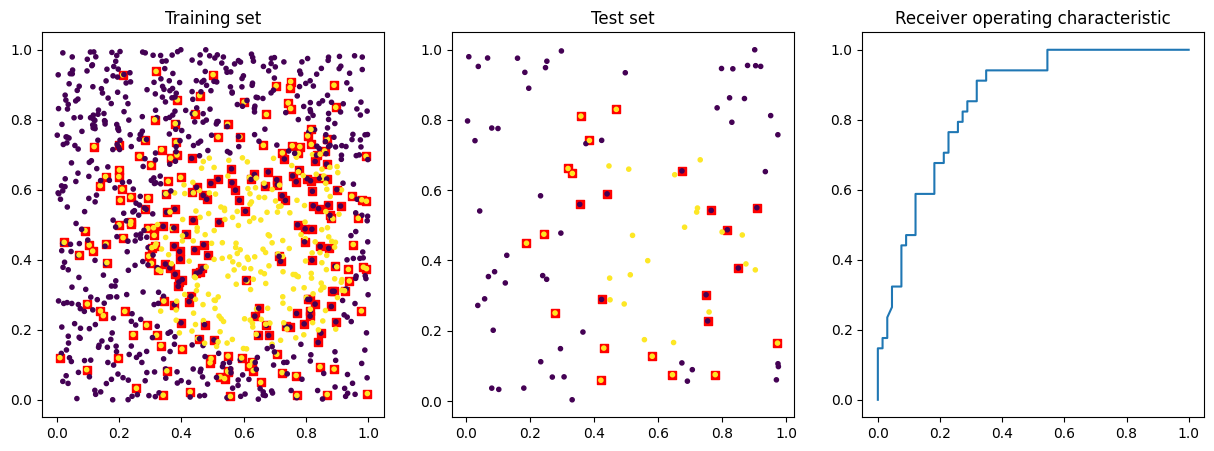

In [38]:
from sklearn import neighbors, svm, ensemble

# Define classifiers
classifiers = {
    "KNeighbors": neighbors.KNeighborsClassifier(n_neighbors=5),
    "SVC (linear kernel)": svm.SVC(kernel='linear', C=1.0),
    "SVC (RBF kernel)": svm.SVC(kernel='rbf', C=1.0, gamma='scale'),
    "RandomForestClassifier": ensemble.RandomForestClassifier(n_estimators=100, max_depth=5)
}

# Evaluate each classifier
for name, clf in classifiers.items():
    print(colored(f"Classifier: {name}", "cyan"))
    benchmark_classifier(clf, problem)

Сравним 4 метода на GaussProblem

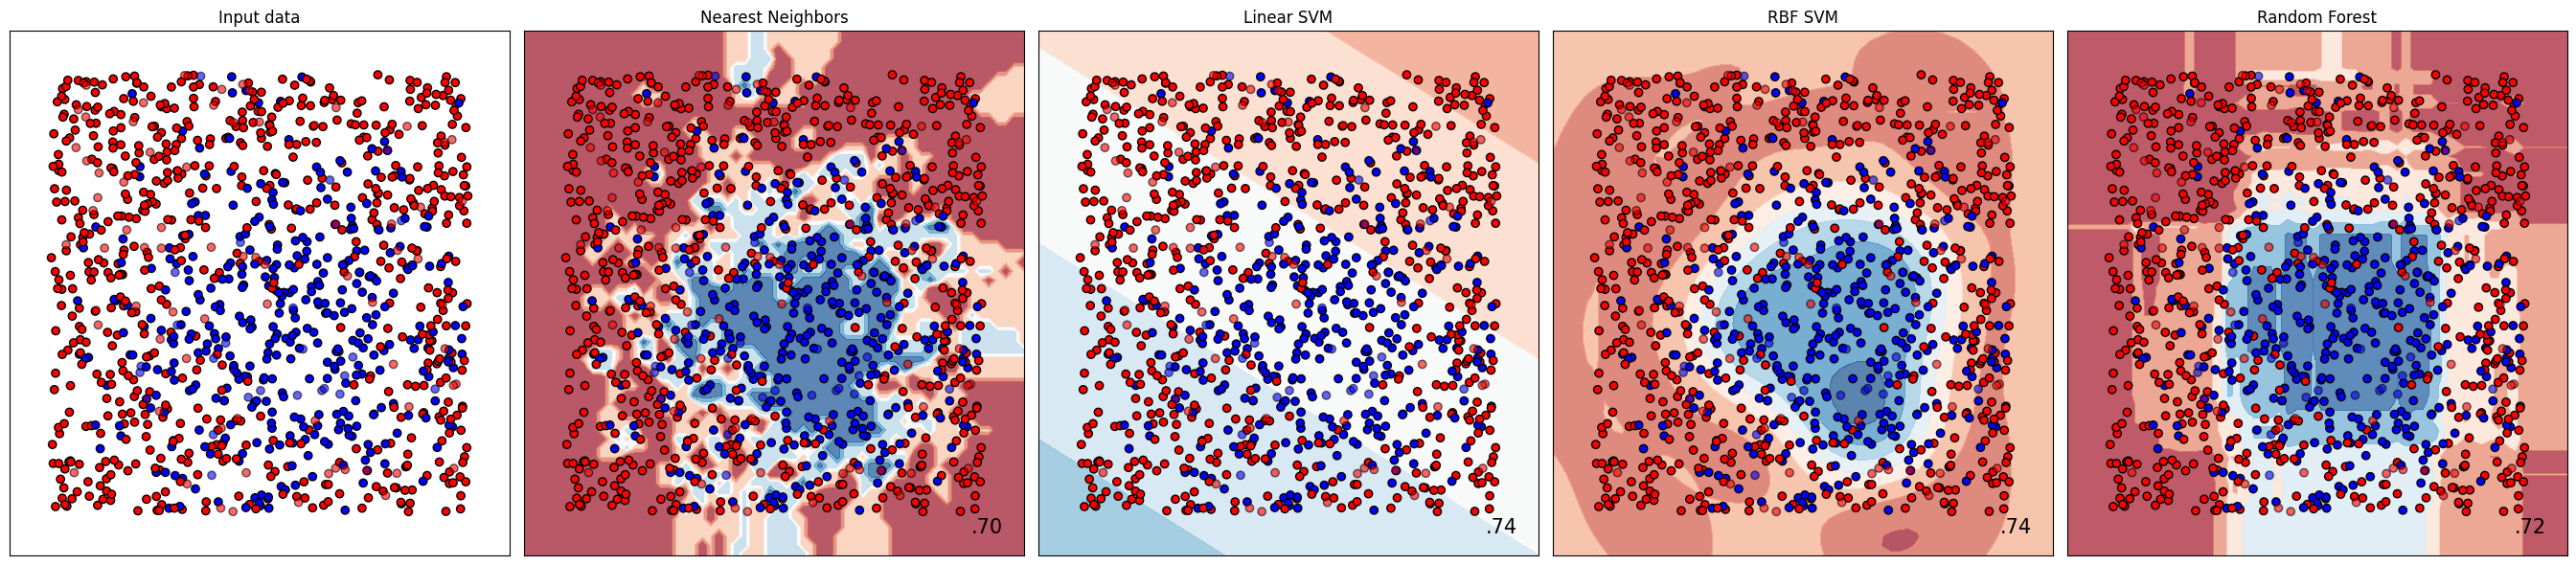

In [48]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Random Forest",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    
]

problem = GaussProblem(center=(0.6, 0.4), radius=0.25)

training_x, training_y = problem.sample(nitems=1000)
test_x, test_y = problem.sample(nitems=100)


figure = plt.figure(figsize=(27, 6))


# preprocess dataset, split into training and test part

i=1
x_min, x_max = training_x[:, 0].min() - 0.1, training_x[:, 0].max() + 0.1
y_min, y_max = training_x[:, 1].min() - 0.1, training_x[:, 1].max() + 0.1

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
ax = plt.subplot(1, len(classifiers) + 1, i)

ax.set_title("Input data")
# Plot the training points
ax.scatter(training_x[:, 0], training_x[:, 1], c=training_y, cmap=cm_bright, edgecolors="k")
# Plot the testing points
ax.scatter(
    test_x[:, 0], test_x[:, 1], c=test_y, cmap=cm_bright, alpha=0.6, edgecolors="k"
)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xticks(())
ax.set_yticks(())


# # iterate over classifiers
for name, clf in zip(names, classifiers):
    i += 1
    ax = plt.subplot(1, len(classifiers) + 1, i)

    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(training_x, training_y)
    score = clf.score(test_x, test_y)
    DecisionBoundaryDisplay.from_estimator(
        clf, training_x, cmap=cm, alpha=0.7, ax=ax, eps=0.5
    )

    # Plot the training points
    ax.scatter(
        training_x[:, 0], training_x[:, 1], c=training_y, cmap=cm_bright, edgecolors="k"
    )
    # Plot the testing points
    ax.scatter(
        test_x[:, 0],
        test_x[:, 1],
        c=test_y,
        cmap=cm_bright,
        edgecolors="k",
        alpha=0.6,
    )

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    ax.text(
        x_max - 0.05,
        y_min + 0.05,
        ("%.2f" % score).lstrip("0"),
        size=15,
        horizontalalignment="right",
    )
    

plt.tight_layout()
plt.show()

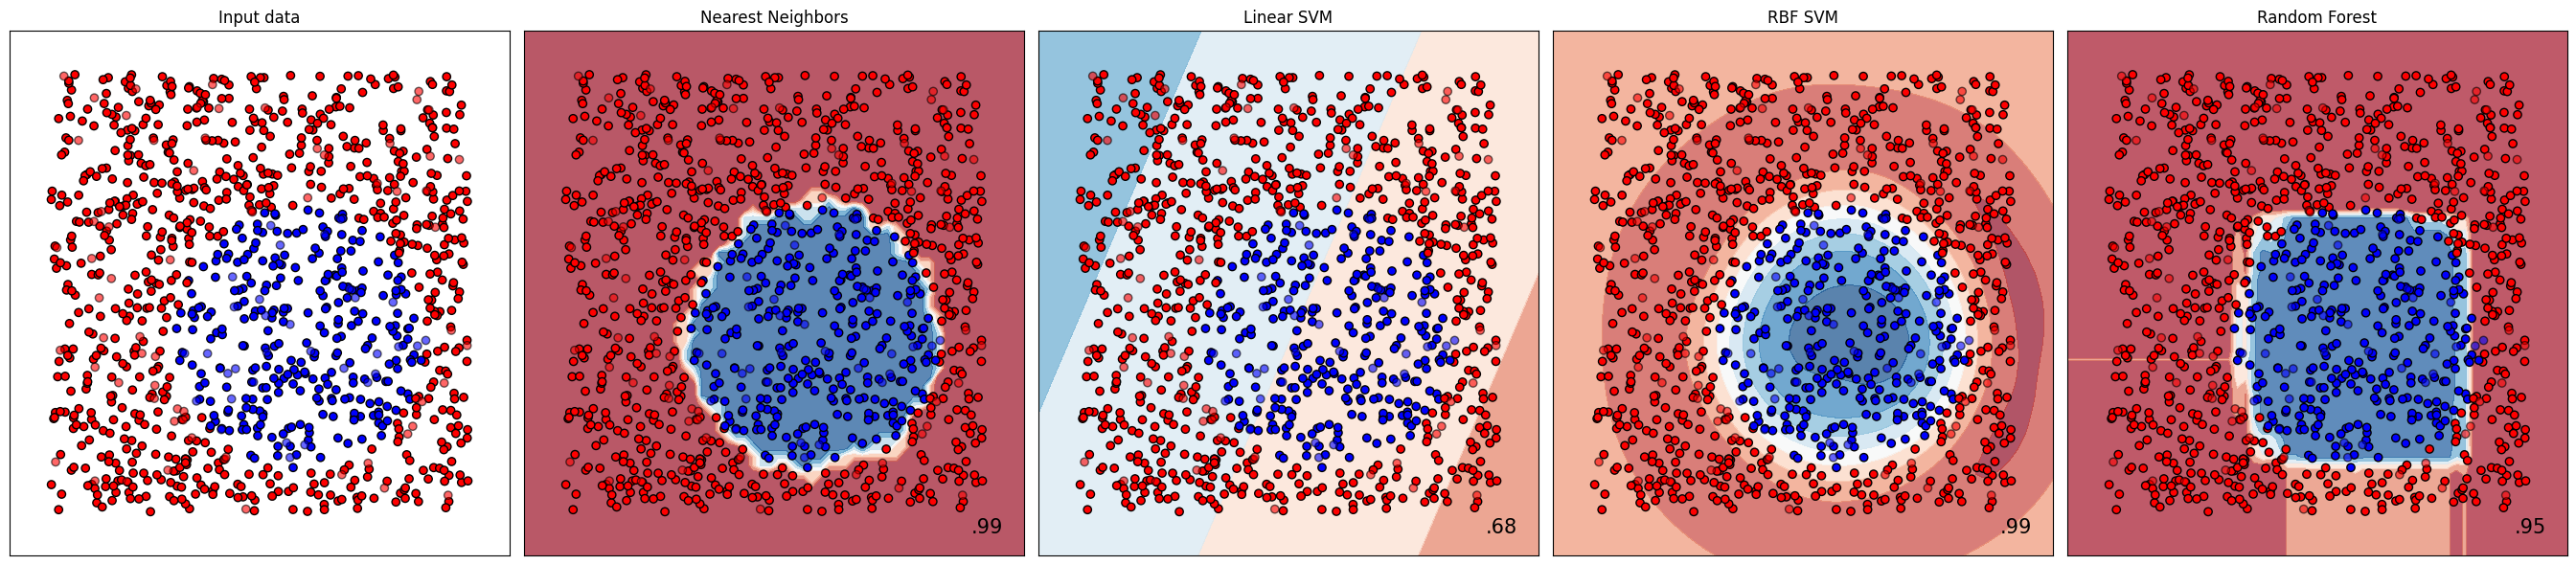

In [45]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Random Forest",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    
]

problem = CircleProblem(center=(0.6, 0.4), radius=0.3)

training_x, training_y = problem.sample(nitems=1000)
test_x, test_y = problem.sample(nitems=100)


figure = plt.figure(figsize=(27, 6))


# preprocess dataset, split into training and test part

i=1
x_min, x_max = training_x[:, 0].min() - 0.1, training_x[:, 0].max() + 0.1
y_min, y_max = training_x[:, 1].min() - 0.1, training_x[:, 1].max() + 0.1

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
ax = plt.subplot(1, len(classifiers) + 1, i)

ax.set_title("Input data")
# Plot the training points
ax.scatter(training_x[:, 0], training_x[:, 1], c=training_y, cmap=cm_bright, edgecolors="k")
# Plot the testing points
ax.scatter(
    test_x[:, 0], test_x[:, 1], c=test_y, cmap=cm_bright, alpha=0.6, edgecolors="k"
)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xticks(())
ax.set_yticks(())


# # iterate over classifiers
for name, clf in zip(names, classifiers):
    i += 1
    ax = plt.subplot(1, len(classifiers) + 1, i)

    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(training_x, training_y)
    score = clf.score(test_x, test_y)
    DecisionBoundaryDisplay.from_estimator(
        clf, training_x, cmap=cm, alpha=0.7, ax=ax, eps=0.5
    )

    # Plot the training points
    ax.scatter(
        training_x[:, 0], training_x[:, 1], c=training_y, cmap=cm_bright, edgecolors="k"
    )
    # Plot the testing points
    ax.scatter(
        test_x[:, 0],
        test_x[:, 1],
        c=test_y,
        cmap=cm_bright,
        edgecolors="k",
        alpha=0.6,
    )

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    ax.text(
        x_max - 0.05,
        y_min + 0.05,
        ("%.2f" % score).lstrip("0"),
        size=15,
        horizontalalignment="right",
    )
    

plt.tight_layout()
plt.show()

Видно, что в случае однозначено определенной границе (CircleProblem) - наилучшим образом работает K-Nearest Neighbors, SVM с радиальным экспоненциальным ядром, эти классификаторы относительно точно определеили форму и положение границы. Random forest достаточно хорошо решил задачу, но границы определил неверно - они более квадратные. 

В случае определения принаджелности к классу вероятностным неперывным распределением, видино, что хуже всего справился K-Nearest и RandomForest, SVM с линейным ядром тоже не супер, лучше всего в этом случае показал себя SVM с радиальным экспоненциальным ядром. Результат понятен - наши данные имеют Гауссово распределение и сама форма датасета - круг, а функция ядра RBF SVM радиально-симметрична, RandomForest отработал хорошо, т.к. алгоритм строится на создании дерева принятий решений, а лес деревьев большой - их хорошо в круг можно поставить (дерево - стпенька). K-Nearest плохо работает при неравномерной плотности распределения (т.к. сильно зависит от локальной плотности точек). 

5. Derive class `EllipseProblem` from `TestProblem` that generates plots of Ellipse. Increase dimensionality of the features space and use `KNeighborsClassifier`, do you see any effects of [curse of dimensionality?](https://en.wikipedia.org/wiki/Curse_of_dimensionality)



Horizontal 
Training data:
Confusion matrix:
 [[909   2]
 [  5  84]]
Recall 99.78%, precision 99.45%, f1-measure 99.62%
Test data:
Confusion matrix:
 [[181   0]
 [  1  18]]
Recall 100.00%, precision 99.45%, f1-measure 99.72%


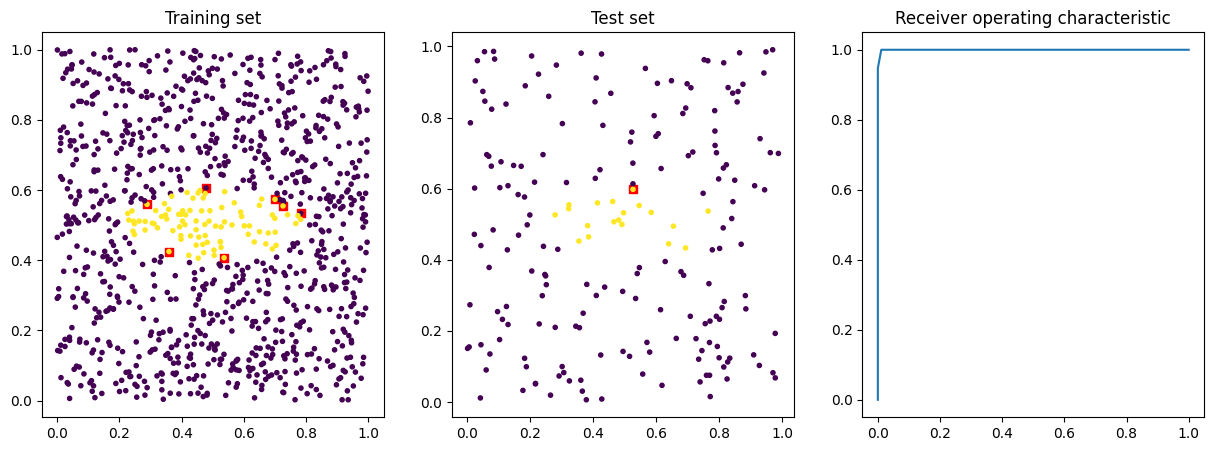


Vertical 
Training data:
Confusion matrix:
 [[891   6]
 [  3 100]]
Recall 99.33%, precision 99.66%, f1-measure 99.50%
Test data:
Confusion matrix:
 [[179   2]
 [  0  19]]
Recall 98.90%, precision 100.00%, f1-measure 99.44%


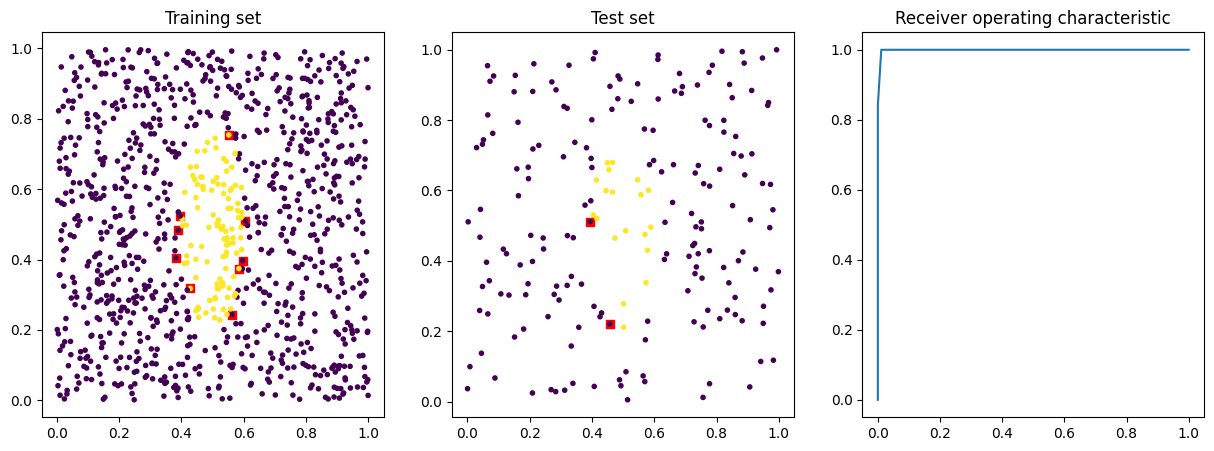


Rotated 45° 
Training data:
Confusion matrix:
 [[918   3]
 [  3  76]]
Recall 99.67%, precision 99.67%, f1-measure 99.67%
Test data:
Confusion matrix:
 [[181   1]
 [  4  14]]
Recall 99.45%, precision 97.84%, f1-measure 98.64%


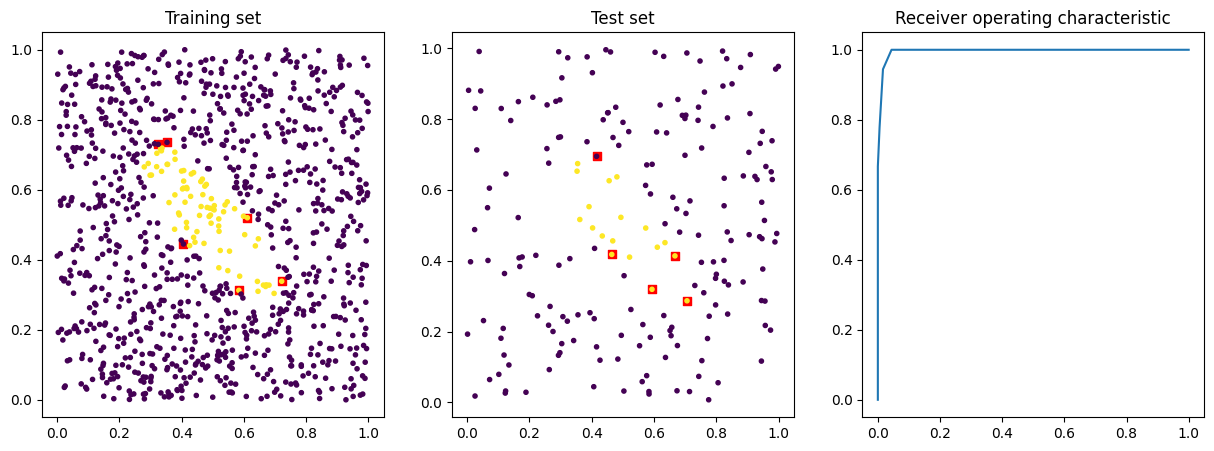


Rotated 25°
Training data:
Confusion matrix:
 [[938   1]
 [  5  56]]
Recall 99.89%, precision 99.47%, f1-measure 99.68%
Test data:
Confusion matrix:
 [[190   1]
 [  0   9]]
Recall 99.48%, precision 100.00%, f1-measure 99.74%


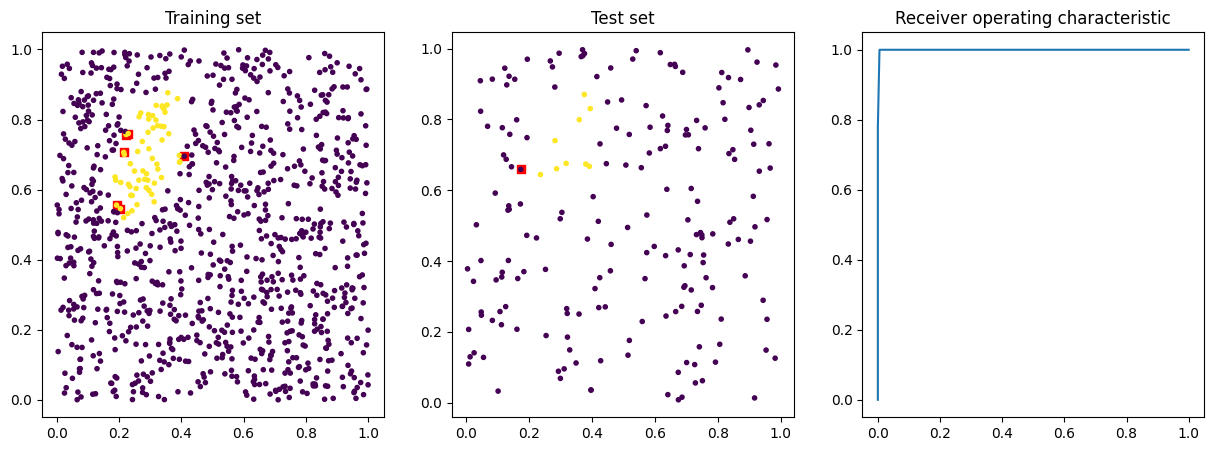

In [53]:
class EllipseProblem(TestProblem):
    def __init__(self, center: np.ndarray, a: float, b: float, angle: float = 0.0):
        self._center = np.array(center)
        self._a = np.float32(a)
        self._b = np.float32(b)
        self._angle = np.float32(angle)
        assert self._center.ndim == 1

    def sample(self, nitems):
        x = np.random.rand(nitems, self._center.shape[0])
        translated = x - self._center
        rot_matrix = np.array([
            [np.cos(self._angle), -np.sin(self._angle)],
            [np.sin(self._angle), np.cos(self._angle)]
        ])
        rotated = translated @ rot_matrix.T
        distance = (rotated[:, 0]**2 / self._a**2) + (rotated[:, 1]**2 / self._b**2)
        y = distance <= 1
        return x, y

configurations = [
    ("Horizontal ", {"center": (0.5, 0.5), "a": 0.3, "b": 0.1, "angle": 0}),
    ("Vertical ", {"center": (0.5, 0.5), "a": 0.1, "b": 0.3, "angle": 0}),
    ("Rotated 45° ", {"center": (0.5, 0.5), "a": 0.3, "b": 0.1, "angle": np.pi/4}),
    ("Rotated 25°", {"center": (0.3, 0.7), "a": 0.1, "b": 0.2, "angle": 25*np.pi/180}),
]

for name, params in configurations:
    print(f"\n{colored(name, 'blue')}")
    problem = EllipseProblem(**params)
    clf = KNeighborsClassifier(n_neighbors=5)
    benchmark_classifier(clf, problem, n_training_samples=1000, n_test_samples=200)






6. Select [important features](https://en.wikipedia.org/wiki/Feature_selection) used by the classifier for `FunctionProblem`. Apply the [principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) and visualize the result. Try to eliminate all features except of the important ones, and check performance of the classifier on the important features. Can you explain, how the classifier decides which class an example belongs to?

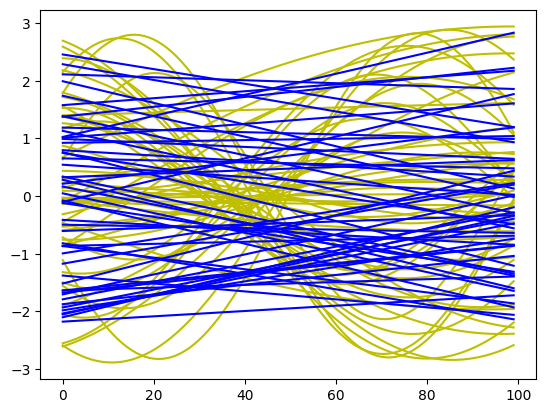

In [59]:
class FunctionProblem(TestProblem):
    def __init__(self, N: int):
        self._N = np.int32(N)
        assert self._N>0
        self._t = np.linspace(-.5,0.5,self._N)
     
    @property
    def t(self):
        return self._t
    
    def sample_zero_class(self, nitems):
        A = np.random.uniform(-3., 3., size=nitems)[:,None]
        B = np.random.uniform(0., 2*np.pi, size=nitems)[:,None]
        C = np.random.uniform(0., 1., size=nitems)[:,None]
        return A*np.sin(B*self.t[None]+C)
    
    def sample_first_class(self, nitems):
        D = np.random.uniform(-2., 2., size=nitems)[:,None]
        E = np.random.uniform(-2., 2., size=nitems)[:,None]
        return D*self.t[None]+E
    
        
    def sample(self, nitems):
        nitems0 = nitems//2
        nitems1 = nitems - nitems0
        x = np.concatenate((self.sample_zero_class(nitems0), self.sample_first_class(nitems1)), axis=0)
        y = np.concatenate((np.zeros(nitems0), np.ones(nitems1)), axis=0)
        assert x.shape == (nitems, self._N)
        assert y.shape == (nitems,)        
        perm = np.random.permutation(nitems)
        return x[perm], y[perm]
    
problem = FunctionProblem(N=100)
problem.visualize(100)
plt.show()

Топ-5 важных признаков:
Признак 90: оценка 0.4217
Признак 91: оценка 0.4384
Признак 92: оценка 0.4543
Признак 93: оценка 0.4690
Признак 94: оценка 0.4824
Признак 95: оценка 0.4945
Признак 96: оценка 0.5049
Признак 97: оценка 0.5137
Признак 98: оценка 0.5208
Признак 99: оценка 0.5260


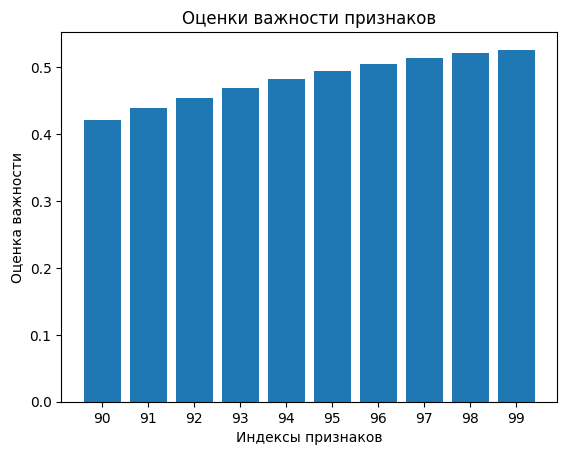

In [151]:
from sklearn.feature_selection import SelectKBest, f_classif


training_x, training_y = problem.sample(nitems=1000)


selector = SelectKBest(score_func=f_classif, k=10)
selected_x = selector.fit_transform(training_x, training_y)


top_features_indices = selector.get_support(indices=True)
top_features_scores = selector.scores_[top_features_indices]


print("Топ-5 важных признаков:")
for idx, score in zip(top_features_indices, top_features_scores):
    print(f"Признак {idx}: оценка {score:.4f}")


import matplotlib.pyplot as plt

plt.bar(range(len(top_features_indices)), top_features_scores, tick_label=top_features_indices)
plt.title("Оценки важности признаков")
plt.xlabel("Индексы признаков")
plt.ylabel("Оценка важности")
plt.show()

Тут признаки - момент времени, в котором рассматриваются знаечния функций. Кажется, что тут все времена дают одинаковый вклад.

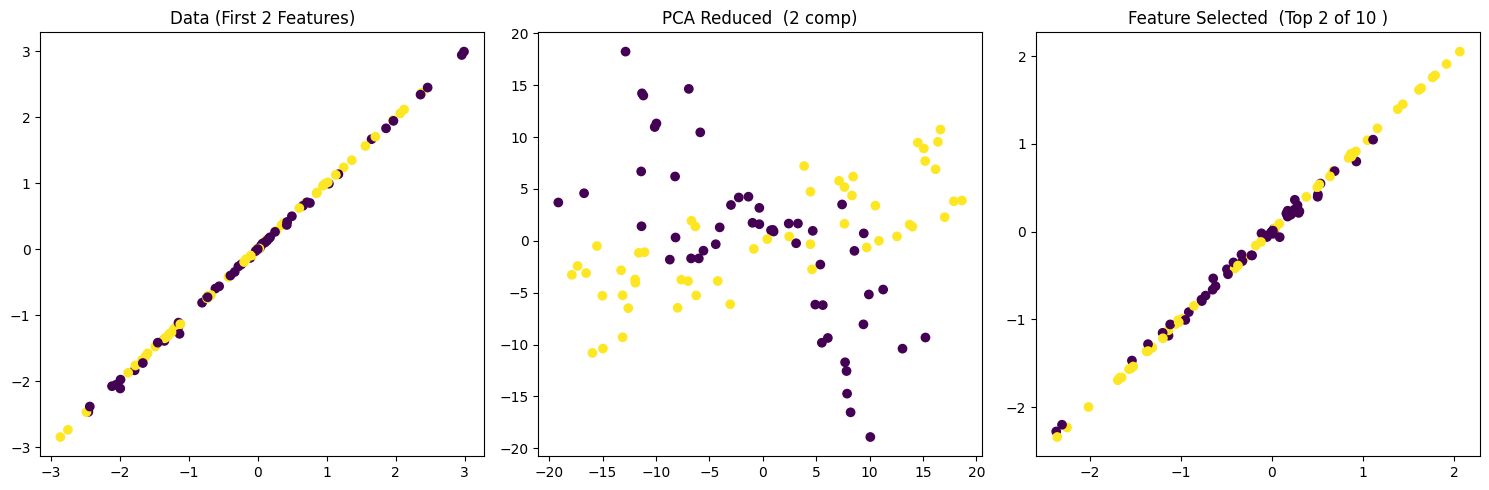

In [158]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif


x, y = problem.sample(100)

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

selector = SelectKBest(f_classif, k=10)
x_selected = selector.fit_transform(x, y)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 5))

ax0.scatter(x[:, 0], x[:, 1], c=y)
ax0.set_title('Data (First 2 Features)')

ax1.scatter(x_pca[:, 0], x_pca[:, 1], c=y)
ax1.set_title('PCA Reduced  (2 comp)')

ax2.scatter(x_selected[:, 0], x_selected[:, 1], c=y)
ax2.set_title('Feature Selected  (Top 2 of 10 )')

plt.tight_layout()
plt.show()


Попробуем как-то обучиться на всех данных\используя пару главных компонент PCA и выбрать топ 2 главных по `f-classif`

All Features
Test Data:
Confusion Matrix:
[[47  3]
 [ 6 44]]
Accuracy: 0.91, Precision: 0.94, Recall: 0.88, F1-Score: 0.91
Top-4 Features (f_classif)
Test Data:
Confusion Matrix:
[[23 27]
 [26 24]]
Accuracy: 0.47, Precision: 0.47, Recall: 0.48, F1-Score: 0.48
PCA (n=2)
Test Data:
Confusion Matrix:
[[47  3]
 [ 6 44]]
Accuracy: 0.91, Precision: 0.94, Recall: 0.88, F1-Score: 0.91


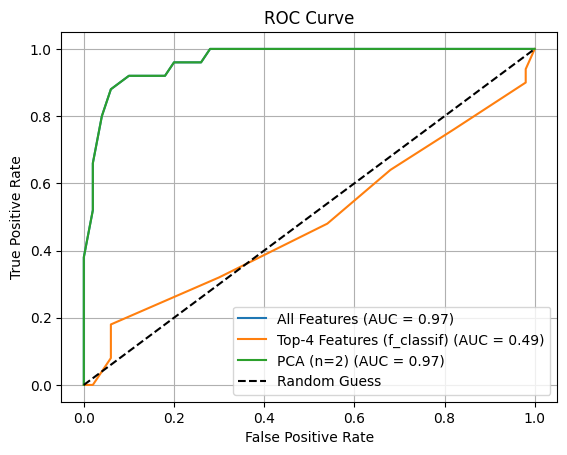

In [201]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def get_metrics_v2(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='binary', zero_division=0)
    rec = recall_score(y_true, y_pred, average='binary', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='binary', zero_division=0)
    print(f"Confusion Matrix:\n{cm}")
    print(f"Accuracy: {acc:.2f}, Precision: {prec:.2f}, Recall: {rec:.2f}, F1-Score: {f1:.2f}")


def benchmark_classifier_func(clf, x_train, y_train, x_test, y_test, title="Classifier Benchmark"):

    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    y_score = clf.predict_proba(x_test)[:, 1] if hasattr(clf, "predict_proba") else y_pred
    y_train_pred = clf.predict(x_train)

    print(colored(f"{title}", "cyan"))
    # print(colored("\nTraining Data:", "yellow"))
    # get_metrics_v2(y_train, y_train_pred)
    
    print(colored("Test Data:", "green"))
    get_metrics_v2(y_test, y_pred)
    
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{title} (AUC = {roc_auc:.2f})')

    return clf


training_x, training_y = problem.sample(nitems=1000)
test_x, test_y = problem.sample(nitems=100)

clf = KNeighborsClassifier(n_neighbors=10)
benchmark_classifier_func(clf, training_x, training_y, test_x, test_y, title="All Features")


selector = SelectKBest(score_func=f_classif, k=4)
training_x_selected = selector.fit_transform(training_x, training_y)
test_x_selected = selector.transform(test_x)

benchmark_classifier_func(clf, training_x_selected, training_y, test_x_selected, test_y, title="Top-4 Features (f_classif)")


pca = PCA(n_components=4)
training_x_pca = pca.fit_transform(training_x)
test_x_pca = pca.transform(test_x)
benchmark_classifier_func(clf, training_x_pca, training_y, test_x_pca, test_y, title="PCA (n=2)")


plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()
